In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
data_train = pd.read_csv("Train.csv")
data_test = pd.read_csv("Test.csv")

In [62]:
data_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

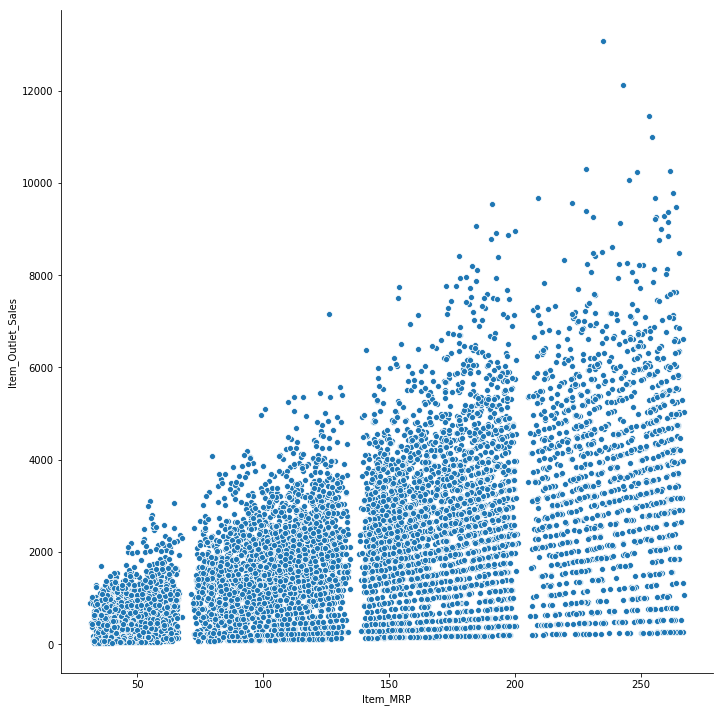

In [63]:
import seaborn as sns
sns.pairplot(data = data_train, y_vars = ['Item_Outlet_Sales'], x_vars = ['Item_MRP'], height = 10 )

In [64]:
from sklearn.linear_model import LinearRegression
linR = LinearRegression()
X = data_train['Item_MRP'].values
Y = data_train['Item_Outlet_Sales'].values
X = X.reshape(X.size,1)
Y = Y.reshape(Y.size,1)
print(X.shape)
print(Y.shape)

(8523, 1)
(8523, 1)


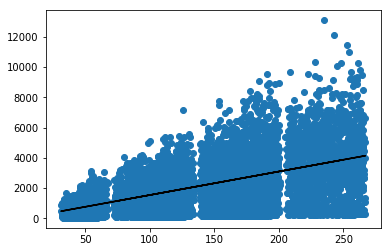

In [65]:
linR.fit(X,Y)
Y_pred = linR.predict(X)
plt.scatter(X,Y)
plt.plot(X,Y_pred, color = 'black')
plt.show()

In [66]:
X = data_train.loc[:,['Item_MRP', 'Outlet_Establishment_Year']]

from sklearn.model_selection import train_test_split
from pandas  import Series, DataFrame
x_tr,x_cv, y_tr, y_cv = train_test_split(X, data_train.Item_Outlet_Sales) 

In [67]:
linR.fit(x_tr,y_tr)
pred = linR.predict(x_cv)
mse = np.mean((pred-y_cv)**2)
print(mse)

1947496.0048695581


In [68]:

coeff = DataFrame(x_tr.columns)
coeff['Coefficient Estimate'] = Series(linR.coef_)
print(coeff)

                           0  Coefficient Estimate
0                   Item_MRP             15.425870
1  Outlet_Establishment_Year            -11.037202


In [69]:
linR.score(x_cv,y_cv)

0.3400547509316896

In [70]:
X = data_train.loc[:,['Outlet_Establishment_Year','Item_MRP','Item_Weight']]
x_tr,x_cv, y_tr, y_cv = train_test_split(X, data_train.Item_Outlet_Sales) 
linR.fit(x_tr, y_tr)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [71]:
#Correcting the issue of nan values in weight
data_train['Item_Weight'].fillna((data_train['Item_Weight'].mean()), inplace = True)

X = data_train.loc[:,['Outlet_Establishment_Year','Item_MRP','Item_Weight']]
x_tr,x_cv, y_tr, y_cv = train_test_split(X, data_train.Item_Outlet_Sales) 
linR.fit(x_tr, y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [72]:
pred = linR.predict(x_cv)
mse = np.mean((y_cv - pred)**2)
print(mse)
print(linR.score(x_cv,y_cv))

1919715.187212338
0.31920953002460495


In [73]:
coeff = DataFrame(x_tr.columns)
coeff['Coefficient Estimate'] = Series(linR.coef_)
print(coeff)

                           0  Coefficient Estimate
0  Outlet_Establishment_Year            -10.519047
1                   Item_MRP             15.713944
2                Item_Weight             -4.059249


In [74]:
#Now taking all features
#imputing missinsing values

data_train['Item_Visibility'] = data_train['Item_Visibility'].replace(0, np.mean(data_train['Item_Visibility']))
data_train['Outlet_Establishment_Year'] = 2013 -  data_train['Outlet_Establishment_Year']
data_train['Outlet_Size'].fillna('Small', inplace = True)


In [75]:
#Creating dummy varibles to convert categorical into numeric values

mylist = list(data_train.select_dtypes(include=['object']).columns)
dummies = pd.get_dummies(data_train[mylist], prefix = mylist)
data_train.drop(mylist, axis =1, inplace = True)

X = pd.concat([data_train, dummies], axis =1)

In [ ]:
#Model Building

# continues by adding more and more features (numerical) and evaluating linear regression
# In case of categorical varibales start with logistic Regression 

